In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
import pandas as pd
from IPython.display import display
import numpy as np

In [2]:
def data_view(df):
    display(df.head())
    display(df.info())
    df.describe()

    # Selecciona solo las columnas con valores numericos
    columnas_numericas = df.select_dtypes(include=[np.number])
    if len(columnas_numericas.columns) > 0:
        num_columnas = len(columnas_numericas.columns)

        # Calcular la mediana de cada columna numérica y la imprime
        print(columnas_numericas.median())

        # Muestra los gráficos de caja de cada columna numérica
        plt.figure(figsize=(20, 0.6*num_columnas))
        sns.boxplot(data=columnas_numericas, orient="h")
        plt.title('Boxplots de todas las columnas numéricas')
        plt.xlabel('Valores')
        plt.ylabel('Columnas')
        plt.show()

        # Grafica un histograma de cada columna numérica
        num_filas = (num_columnas + 2) // 3
        num_columnas_figura = 3

        fig, axes = plt.subplots(nrows=num_filas, ncols=num_columnas_figura, figsize=(20, 5*num_filas))

        # Convertir 'axes' de 2D a 1D
        axes = axes.ravel()

        for i, columna in enumerate(columnas_numericas):
            sns.histplot(df[columna], bins=20, kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma de {columna}')
            axes[i].set_xlabel('Valor')
            axes[i].set_ylabel('Frecuencia')

        plt.tight_layout()
        plt.show()

In [3]:
def boxplot(data):
    plt.figure(figsize=(20, 2))
    sns.boxplot(data=data, orient="h")
    plt.title(data.name)
    plt.xlabel('Cantidad de accesos')
    plt.show()

In [4]:
df = pd.read_pickle(f'./Internet_datasets/Acceso_Internet_Fijo_por_rangos_velocidad_bajada_y_provincia.pickle')

In [5]:
df.head()

,Año,Trimestre,Provincia,hasta 512kb,512Kb a 1Mb,1Mb a 6Mb,6Mb a 10Mb,10Mb a 20Mb,20Mb a 30Mb,mas de 30Mb,Otros,Total
0,2022,1,Buenos Aires,31591,30056,313382,321756,290127,161183,3381049,2628,4555424
1,2022,1,Capital Federal,5270,5575,39918,7739,61053,43289,1188072,1717,1417541
2,2022,1,Catamarca,710,4560,4386,7009,8773,3761,35715,2207,62378
3,2022,1,Chaco,4610,1099,16888,21235,20898,13012,62946,758,144119
4,2022,1,Chubut,1130,1677,61369,31856,3308,13871,14055,15607,171628


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Año          792 non-null    int64 
 1   Trimestre    792 non-null    int64 
 2   Provincia    792 non-null    object
 3   hasta 512kb  792 non-null    int32 
 4   512Kb a 1Mb  792 non-null    int32 
 5   1Mb a 6Mb    792 non-null    int32 
 6   6Mb a 10Mb   792 non-null    int32 
 7   10Mb a 20Mb  792 non-null    int32 
 8   20Mb a 30Mb  792 non-null    int32 
 9   mas de 30Mb  792 non-null    int32 
 10  Otros        792 non-null    int32 
 11  Total        792 non-null    int32 
dtypes: int32(9), int64(2), object(1)
memory usage: 46.5+ KB


In [7]:
df['hasta 1Mb'] = df[df.columns[3:5]].sum(axis=1)
df['1Mb a 10Mb'] = df[df.columns[5:7]].sum(axis=1)
df.drop(df.columns[3:7],axis=1,inplace=True)

In [8]:
df.drop(['Otros','Total'],axis=1,inplace=True)

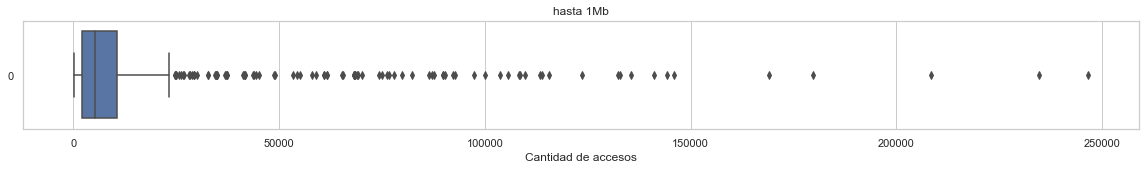

In [140]:
boxplot(df['hasta 1Mb'])

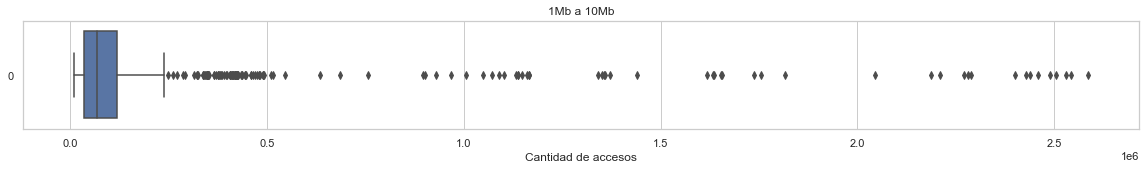

In [126]:
boxplot(df['1Mb a 10Mb'])

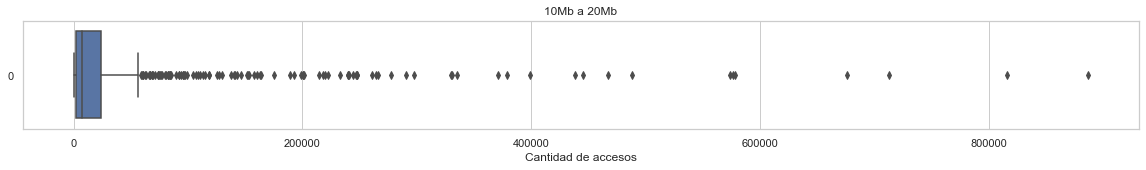

In [127]:
boxplot(df['10Mb a 20Mb'])

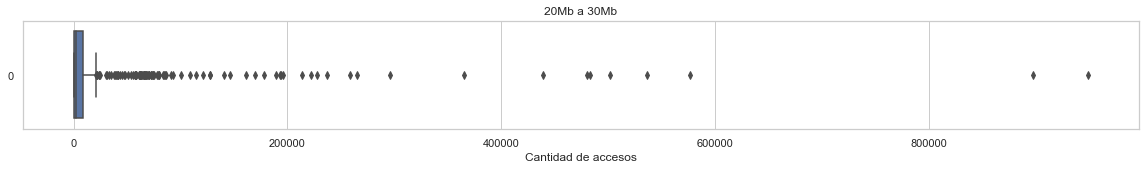

In [128]:
boxplot(df['20Mb a 30Mb'])

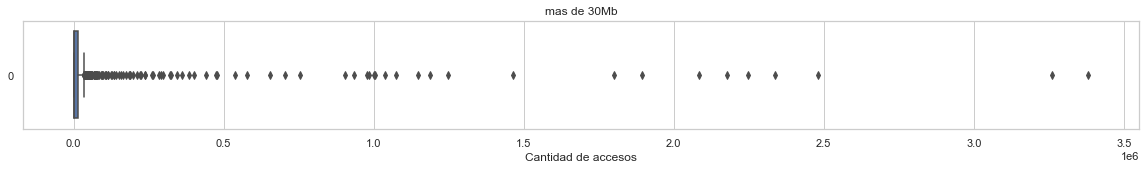

In [129]:
boxplot(df['mas de 30Mb'])

Los graficos de cajas muestran que las columnas numericas tienen gran cantidad de valores atipicos pero esto no es un problema ya que no hay un maximo de accesos a las distintas velocidades de internet.

Al igual que en los graficos de caja, se puede ver la gran variacion de valores.

In [9]:
#df['Año y trimestre'] = df['Año'].astype(str)+'-'+df['Trimestre'].astype(str)
#df.drop(['Año','Trimestre'],axis=1,inplace=True)
df.head()

,Año,Trimestre,Provincia,10Mb a 20Mb,20Mb a 30Mb,mas de 30Mb,hasta 1Mb,1Mb a 10Mb
0,2022,1,Buenos Aires,290127,161183,3381049,61647,635138
1,2022,1,Capital Federal,61053,43289,1188072,10845,47657
2,2022,1,Catamarca,8773,3761,35715,5270,11395
3,2022,1,Chaco,20898,13012,62946,5709,38123
4,2022,1,Chubut,3308,13871,14055,2807,93225


In [10]:
df = df.groupby(['Año', 'Trimestre']).sum().reset_index()
df.head()

C:\Users\guill\AppData\Local\Temp\ipykernel_12036\3365510043.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df = df.groupby(['Año', 'Trimestre']).sum().reset_index()


,Año,Trimestre,10Mb a 20Mb,20Mb a 30Mb,mas de 30Mb,hasta 1Mb,1Mb a 10Mb
0,2014,1,138018,3450,11595,761822,5421276
1,2014,2,168864,4780,12259,724211,5493270
2,2014,3,194318,5070,12424,655951,5437430
3,2014,4,294983,33117,15229,584271,5398125
4,2015,1,377856,23213,16347,596750,5458143


In [11]:
df['Periodo'] = df['Año'].astype(str) + '-Q' + df['Trimestre'].astype(str)
# Ordenar el DataFrame por la columna "Periodo"
df = df.sort_values(by='Periodo')
df.head()

,Año,Trimestre,10Mb a 20Mb,20Mb a 30Mb,mas de 30Mb,hasta 1Mb,1Mb a 10Mb,Periodo
0,2014,1,138018,3450,11595,761822,5421276,2014-Q1
1,2014,2,168864,4780,12259,724211,5493270,2014-Q2
2,2014,3,194318,5070,12424,655951,5437430,2014-Q3
3,2014,4,294983,33117,15229,584271,5398125,2014-Q4
4,2015,1,377856,23213,16347,596750,5458143,2015-Q1


In [12]:
df[df.columns[3:7]] = df[df.columns[3:7]].astype(int)

In [13]:
df.drop(['Año','Trimestre'],inplace=True,axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   10Mb a 20Mb  33 non-null     int32 
 1   20Mb a 30Mb  33 non-null     int32 
 2   mas de 30Mb  33 non-null     int32 
 3   hasta 1Mb    33 non-null     int32 
 4   1Mb a 10Mb   33 non-null     int32 
 5   Periodo      33 non-null     object
dtypes: int32(5), object(1)
memory usage: 1.2+ KB


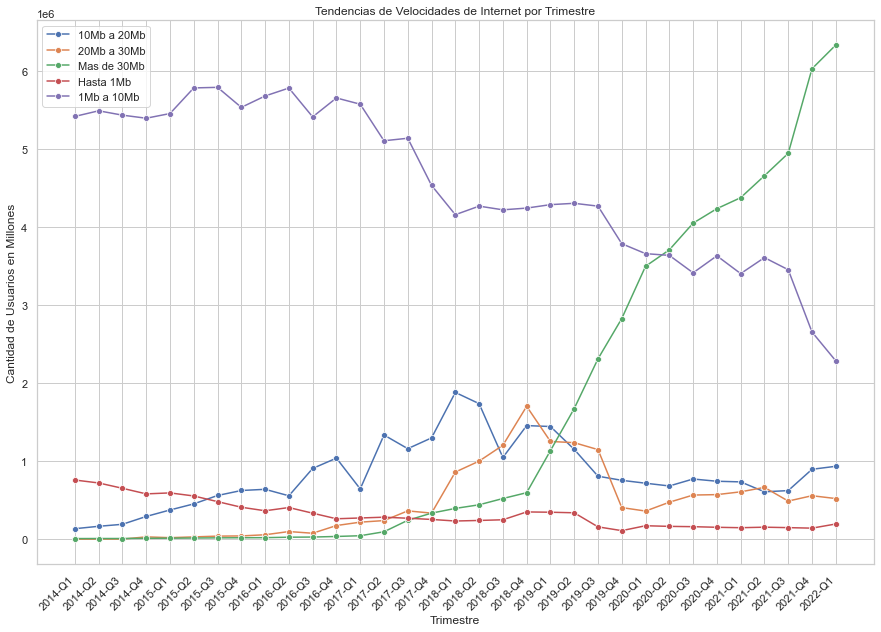

In [18]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, 10))
sns.lineplot(x="Periodo", y="10Mb a 20Mb", data=df, marker='o', label="10Mb a 20Mb")
sns.lineplot(x="Periodo", y="20Mb a 30Mb", data=df, marker='o', label="20Mb a 30Mb")
sns.lineplot(x="Periodo", y="mas de 30Mb", data=df, marker='o', label="Mas de 30Mb")
sns.lineplot(x="Periodo", y="hasta 1Mb", data=df, marker='o', label="Hasta 1Mb")
sns.lineplot(x="Periodo", y="1Mb a 10Mb", data=df, marker='o', label="1Mb a 10Mb")
plt.title("Tendencias de Velocidades de Internet por Trimestre")
plt.xlabel("Trimestre")
plt.ylabel("Cantidad de Usuarios en Millones")
plt.xticks(rotation=45, ha='right') 
plt.legend()
plt.show()

Se observa que a nivel nacional la cantidad de accesos a velocidades mayores a 30Mb crece mientras que en el caso de velocidades menores la tendencia es bajista, esta tendencia se corresponde con la evolucion de las tecnologias de conexion a internet ya que con la implementacion de nuevas tecnologias las velocidades crecen y al mismo tiempo la demanda aumenta segun los precios por el servicio disminuyen.

***

In [19]:
df = pd.read_pickle(f'./Internet_datasets/Acceso_Internet_fijo_por_tecnología_y_provincia.pickle')

In [32]:
df.to_csv('./Internet_datasets/Acceso_Internet_fijo_por_tecnología_y_provincia.csv')

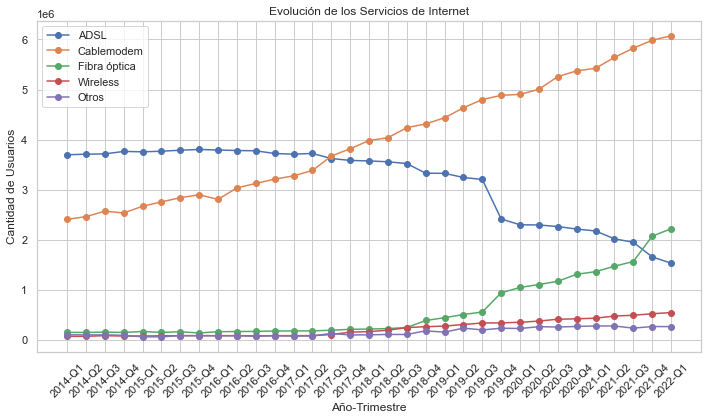

In [21]:
fig, ax = plt.subplots(figsize=(10, 6))

servicios = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
for servicio in servicios:
    df_servicio = df.groupby(['Año', 'Trimestre'])[servicio].sum().reset_index()
    ax.plot(df_servicio['Año'].astype(str) + '-Q' + df_servicio['Trimestre'].astype(str), df_servicio[servicio], marker='o', label=servicio)

ax.set_xlabel('Año-Trimestre')
ax.set_ylabel('Cantidad de Usuarios')
ax.set_title('Evolución de los Servicios de Internet')
ax.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

***

In [22]:
df = pd.read_pickle(f'./Internet_datasets/Ingresos_trimestrales_prestación_servicio_Internet_fijo.pickle')

In [23]:
df.to_csv('./Internet_datasets/Ingresos_trimestrales_prestación_servicio_Internet_fijo.csv')

In [35]:
df = df.sort_values(['Año','Trimestre'])

In [37]:
df.reset_index(inplace=True)

C:\Users\guill\AppData\Local\Temp\ipykernel_10780\2553413845.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='Periodo', y='Ingresos (miles de pesos)', hue='Año', marker='o', ci=None)


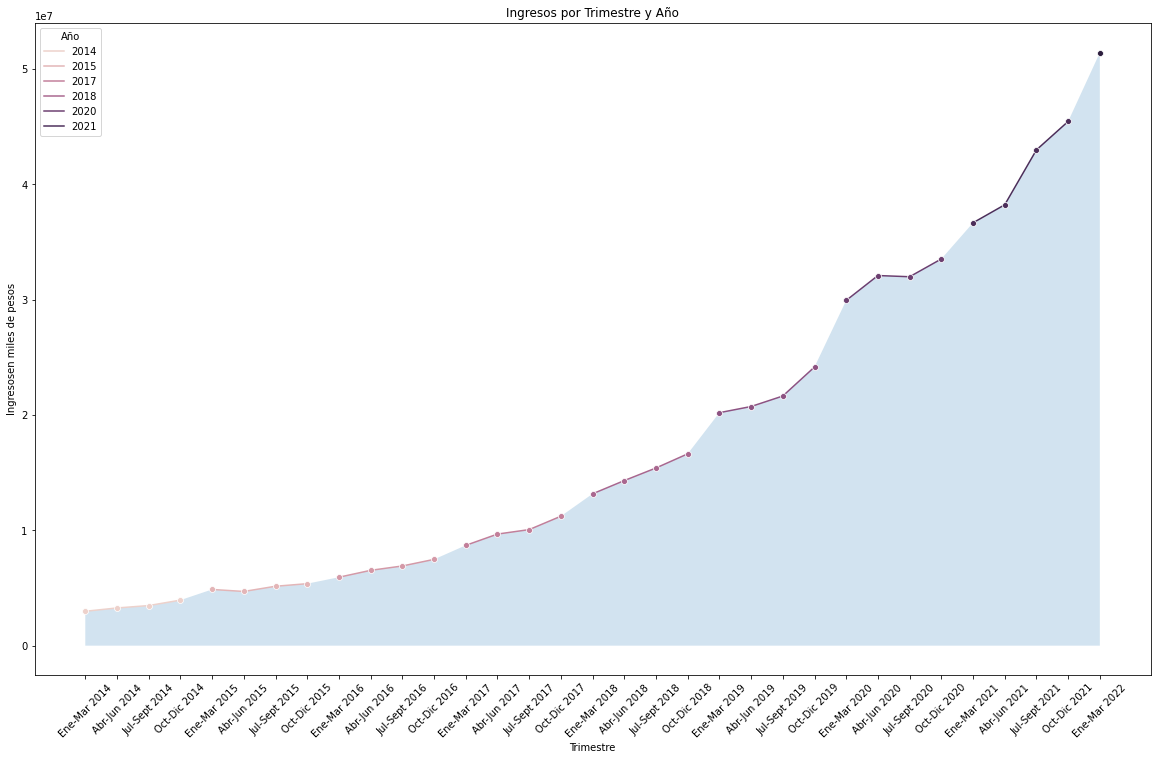

In [6]:
# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(20, 12))
sns.lineplot(data=df, x='Periodo', y='Ingresos (miles de pesos)', hue='Año', marker='o', ci=None)
plt.fill_between(df['Periodo'], df['Ingresos (miles de pesos)'], alpha=0.2)
plt.xlabel('Trimestre')
plt.ylabel('Ingresosen miles de pesos')
plt.title('Ingresos por Trimestre y Año')
plt.xticks(rotation=45)
plt.show()

Este grafico demuestras que proveer de acceso a internet es una actividad muy rentable y se podria adjudicar a la globalizacion y a la necesidad de mayores velocidades ya que no solo aumenta la demanda sino que tambien la magnitud de la informacion que se sube y se baja de la internet.

In [10]:
# Crea una columna con la diferencia de ingresos por trimestre y otra con el porcentaje de crecimiento que se tuvo por trimestre
df['Diferencia'] = df['Ingresos (miles de pesos)'].diff()
df['Porcentaje_Crecimiento'] = round(df['Diferencia'] / df['Ingresos (miles de pesos)'].shift() * 100,2)

In [11]:
df

,Año,Trimestre,Ingresos (miles de pesos),Periodo,Diferencia,Porcentaje_Crecimiento
32,2014,1,2984054,Ene-Mar 2014,NaN,NaN
31,2014,2,3270816,Abr-Jun 2014,286762.0,9.61
30,2014,3,3478638,Jul-Sept 2014,207822.0,6.35
29,2014,4,3950441,Oct-Dic 2014,471803.0,13.56
28,2015,1,4876385,Ene-Mar 2015,925944.0,23.44
27,2015,2,4701791,Abr-Jun 2015,-174594.0,-3.58
26,2015,3,5153739,Jul-Sept 2015,451948.0,9.61
25,2015,4,5376899,Oct-Dic 2015,223160.0,4.33
24,2016,1,5936845,Ene-Mar 2016,559946.0,10.41
23,2016,2,6534241,Abr-Jun 2016,597396.0,10.06


Segun los nuevos datos se observa que en el año 2015 entre Abr-Jun se produjo un decrecimiento del 3.58 y luego en el 2020 entre Jul-Sept de 0.33%.

In [13]:
print('Promedio total : ',df['Porcentaje_Crecimiento'].mean())

Promedio total :  9.4728125


Como dato extra el promedio de crecimiento entre el año 2014 y 2022 fue del 9.47 %

***

In [41]:
df = pd.read_pickle(f'./Internet_datasets/Penetración_de_Internet fijo_(accesos_cada_100 hogares).pickle')

In [5]:
df.to_csv('./Internet_datasets/Penetración_de_Internet fijo_(accesos_cada_100 hogares).csv')

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,1,Buenos Aires,76.08
1,2022,1,Capital Federal,111.80
2,2022,1,Catamarca,58.21
3,2022,1,Chaco,44.06
4,2022,1,Chubut,88.05


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 792 entries, 0 to 791
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           792 non-null    int64  
 1   Trimestre                     792 non-null    int64  
 2   Provincia                     792 non-null    object 
 3   Accesos por cada 100 hogares  792 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 24.9+ KB


None

Año                             2018.000
Trimestre                          2.000
Accesos por cada 100 hogares      44.625
dtype: float64


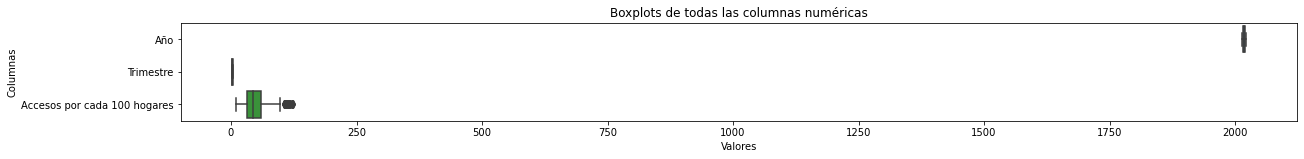

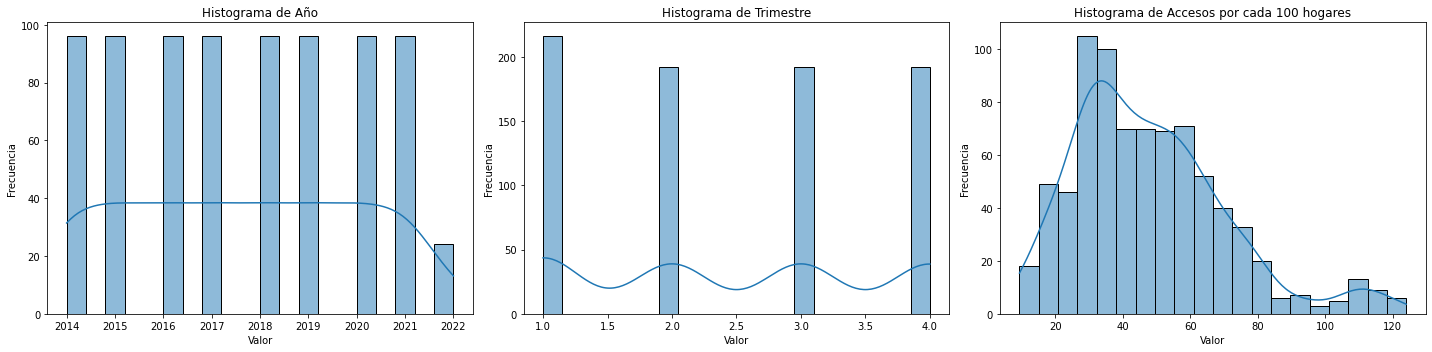

In [6]:
data_view(df)

In [23]:
df = df.sort_values(['Año','Trimestre'])

In [33]:
df = df.sort_values(by=['Año', 'Trimestre','Provincia'])

In [34]:
df

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
768,2014,1,Buenos Aires,54.57
769,2014,1,Capital Federal,112.25
770,2014,1,Catamarca,24.25
771,2014,1,Chaco,20.72
772,2014,1,Chubut,41.24
...,...,...,...,...
19,2022,1,Santa Cruz,43.34
20,2022,1,Santa Fe,77.30
21,2022,1,Santiago Del Estero,47.17
22,2022,1,Tierra Del Fuego,98.29


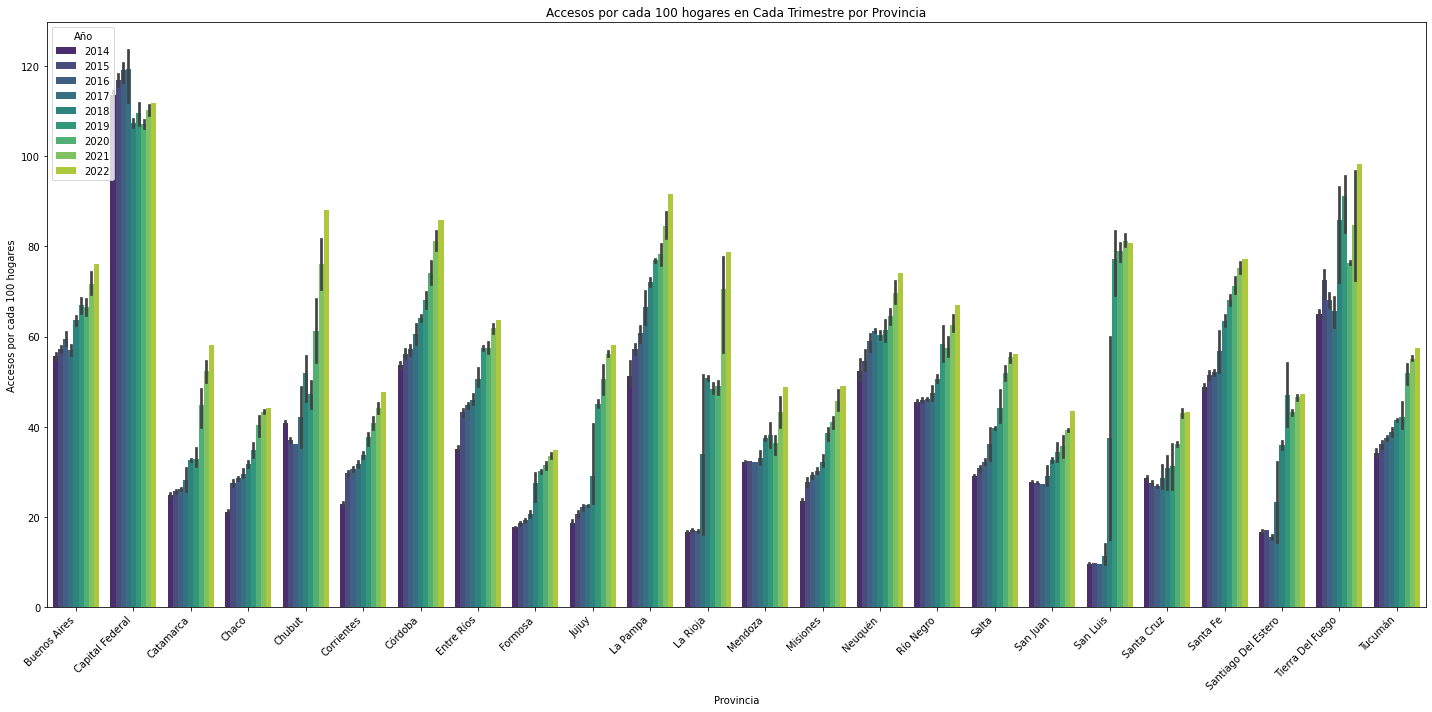

In [35]:
# Crear el gráfico de barras agrupadas con Seaborn
plt.figure(figsize=(20, 10))
sns.barplot(data=df, x='Provincia', y='Accesos por cada 100 hogares', hue='Año', palette='viridis')

# Personalizar etiquetas y título
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hogares')
plt.title('Accesos por cada 100 hogares en Cada Trimestre por Provincia')

# Mostrar leyenda
plt.legend(title='Año', loc='upper left')

# Rotar las etiquetas del eje X para una mejor visualización
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

***